In [9]:
import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd

luna_path = "E:/data mining/final project/data/subset0/"
csv_path = "E:/data mining/final project/data/CSVFILES/"
mhd_file = glob(luna_path + "*.mhd")

def get_pathname(file_id):
    global mhd_file
    for f in mhd_file:
        if file_id in f:
            return f
    
    

nodules = pd.read_csv(csv_path + "annotations.csv")
nodules['file'] = nodules['seriesuid'].apply(get_pathname)
nodules = nodules.dropna()

f = mhd_file[1]
nodule = nodules[nodules['file'] == f]
        

start...


119
[ 110.  347.   33.]


C:\Users\Xiao Zhang\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Xiao Zhang\Anaconda2\lib\site-packages\ipykernel\__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


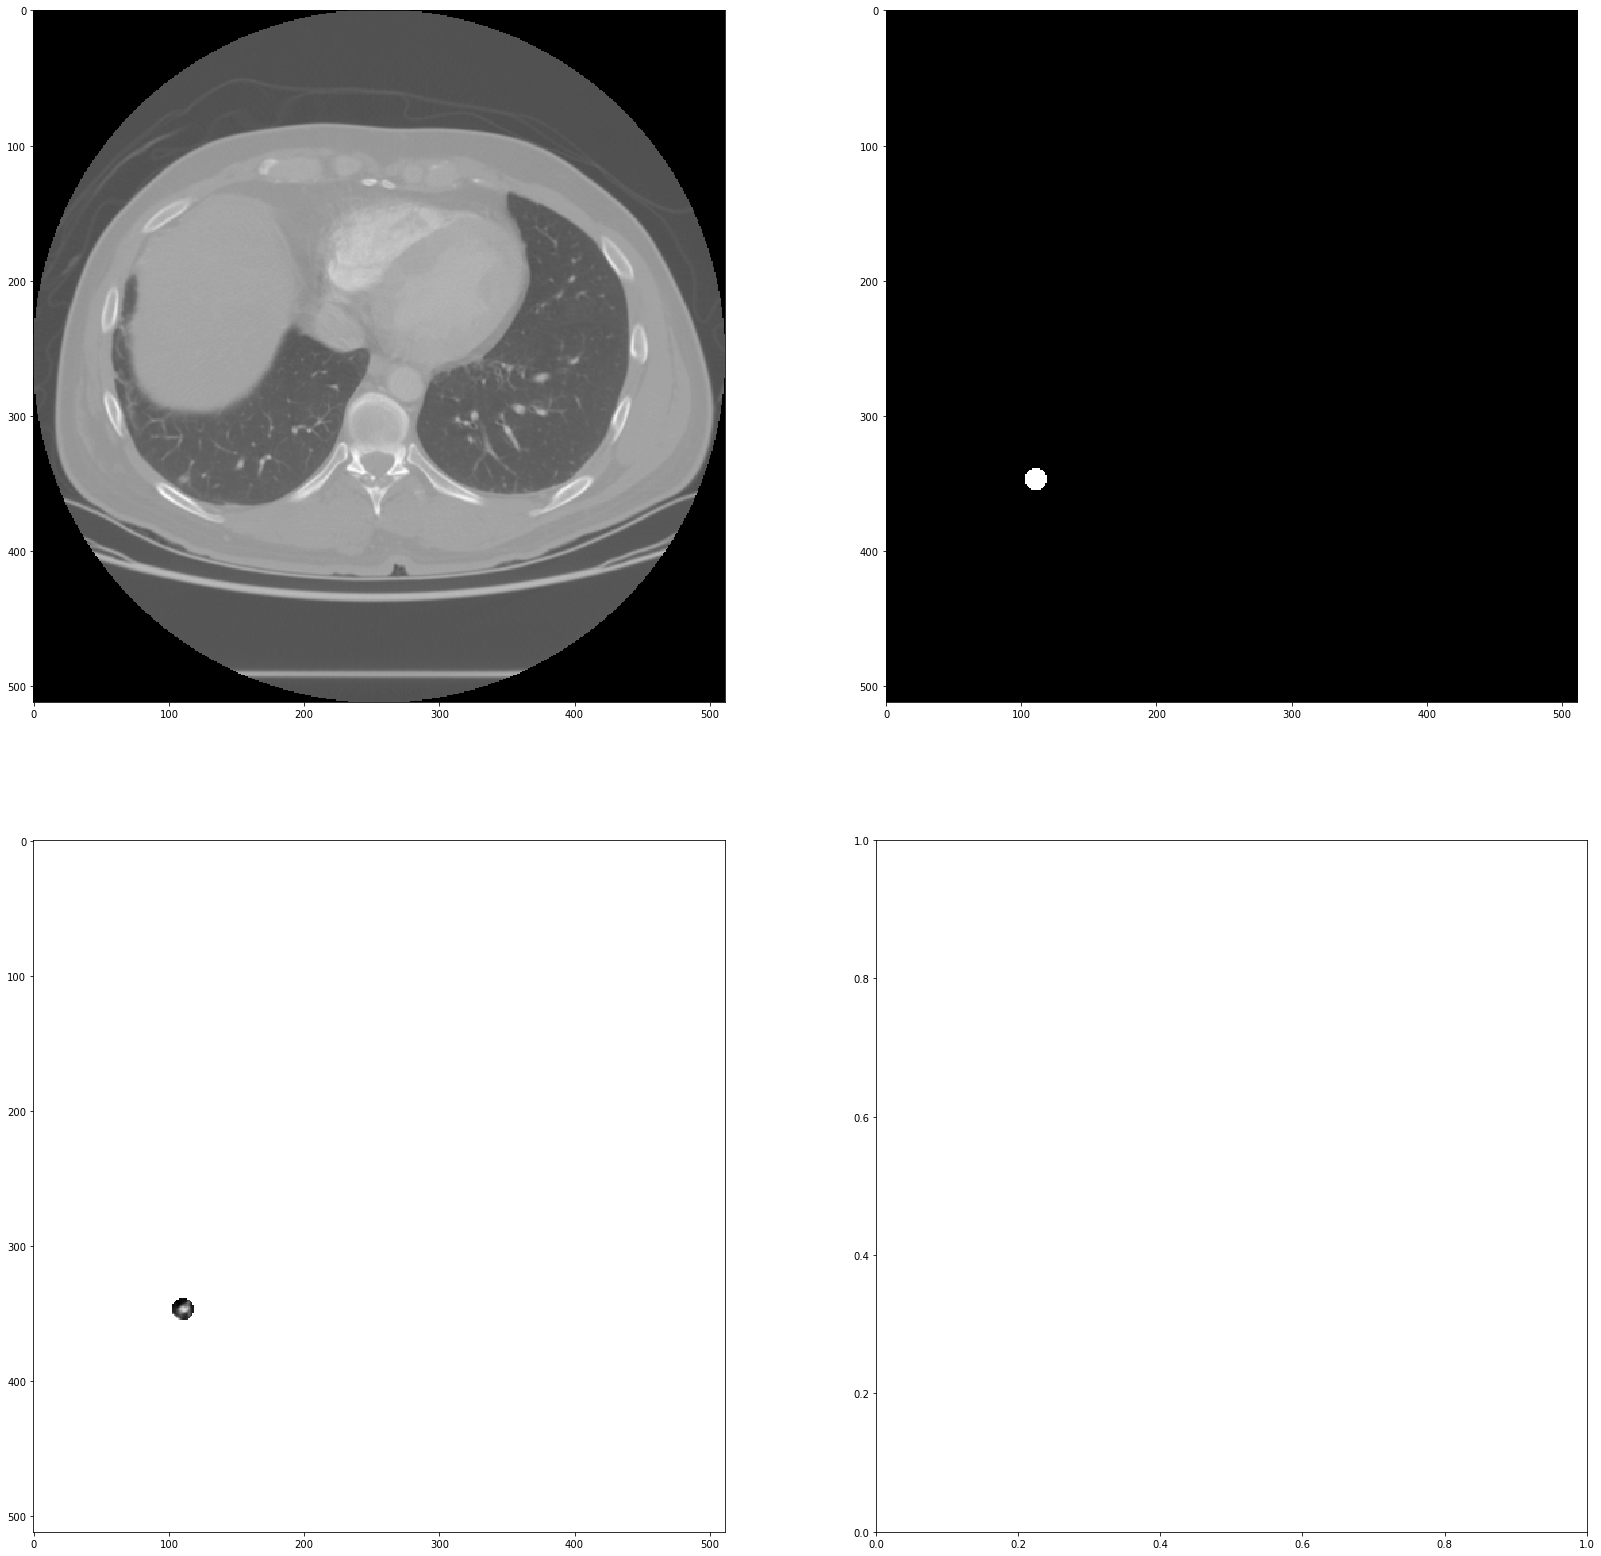

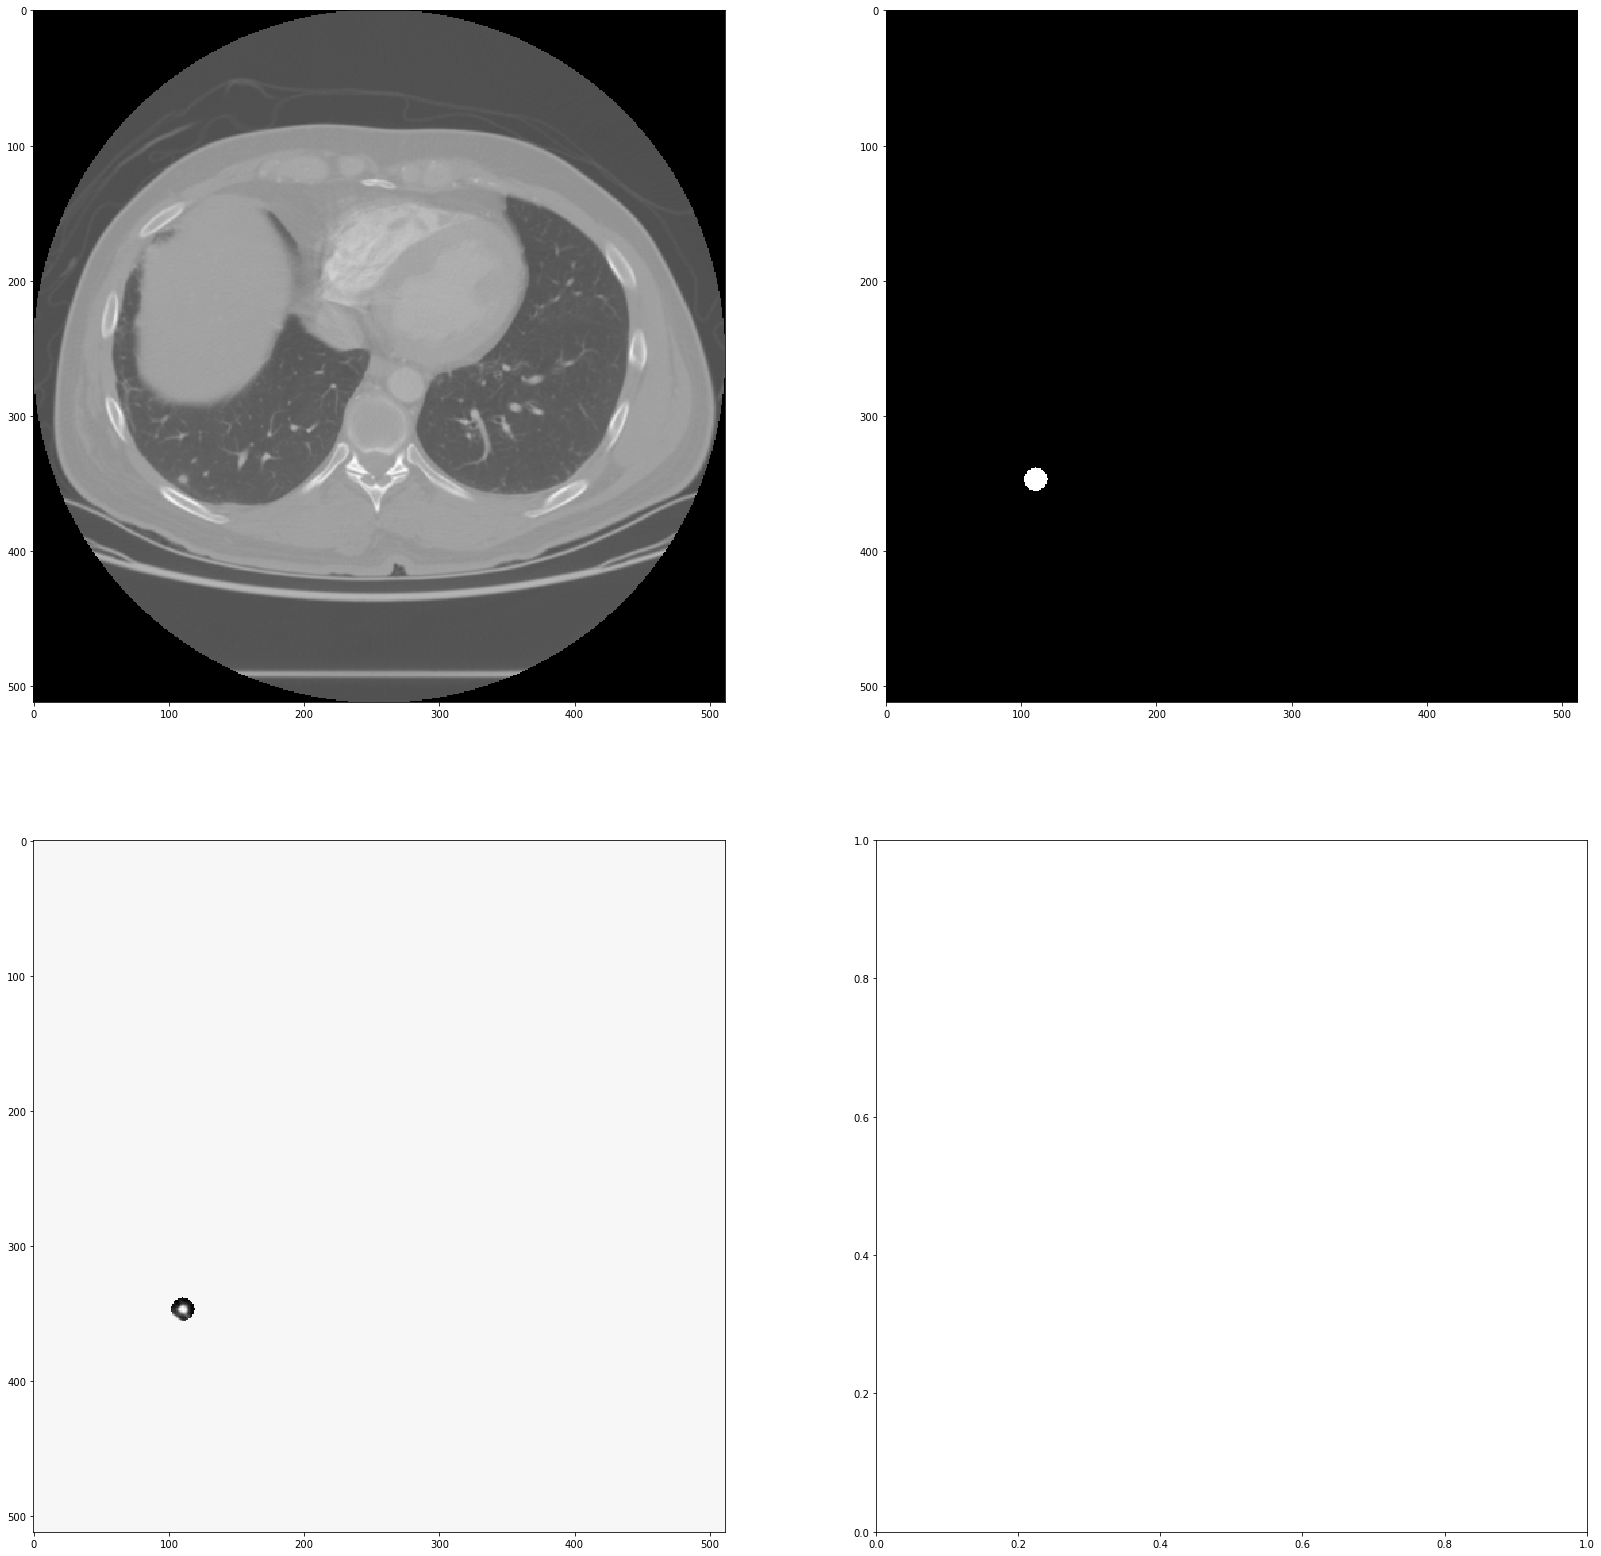

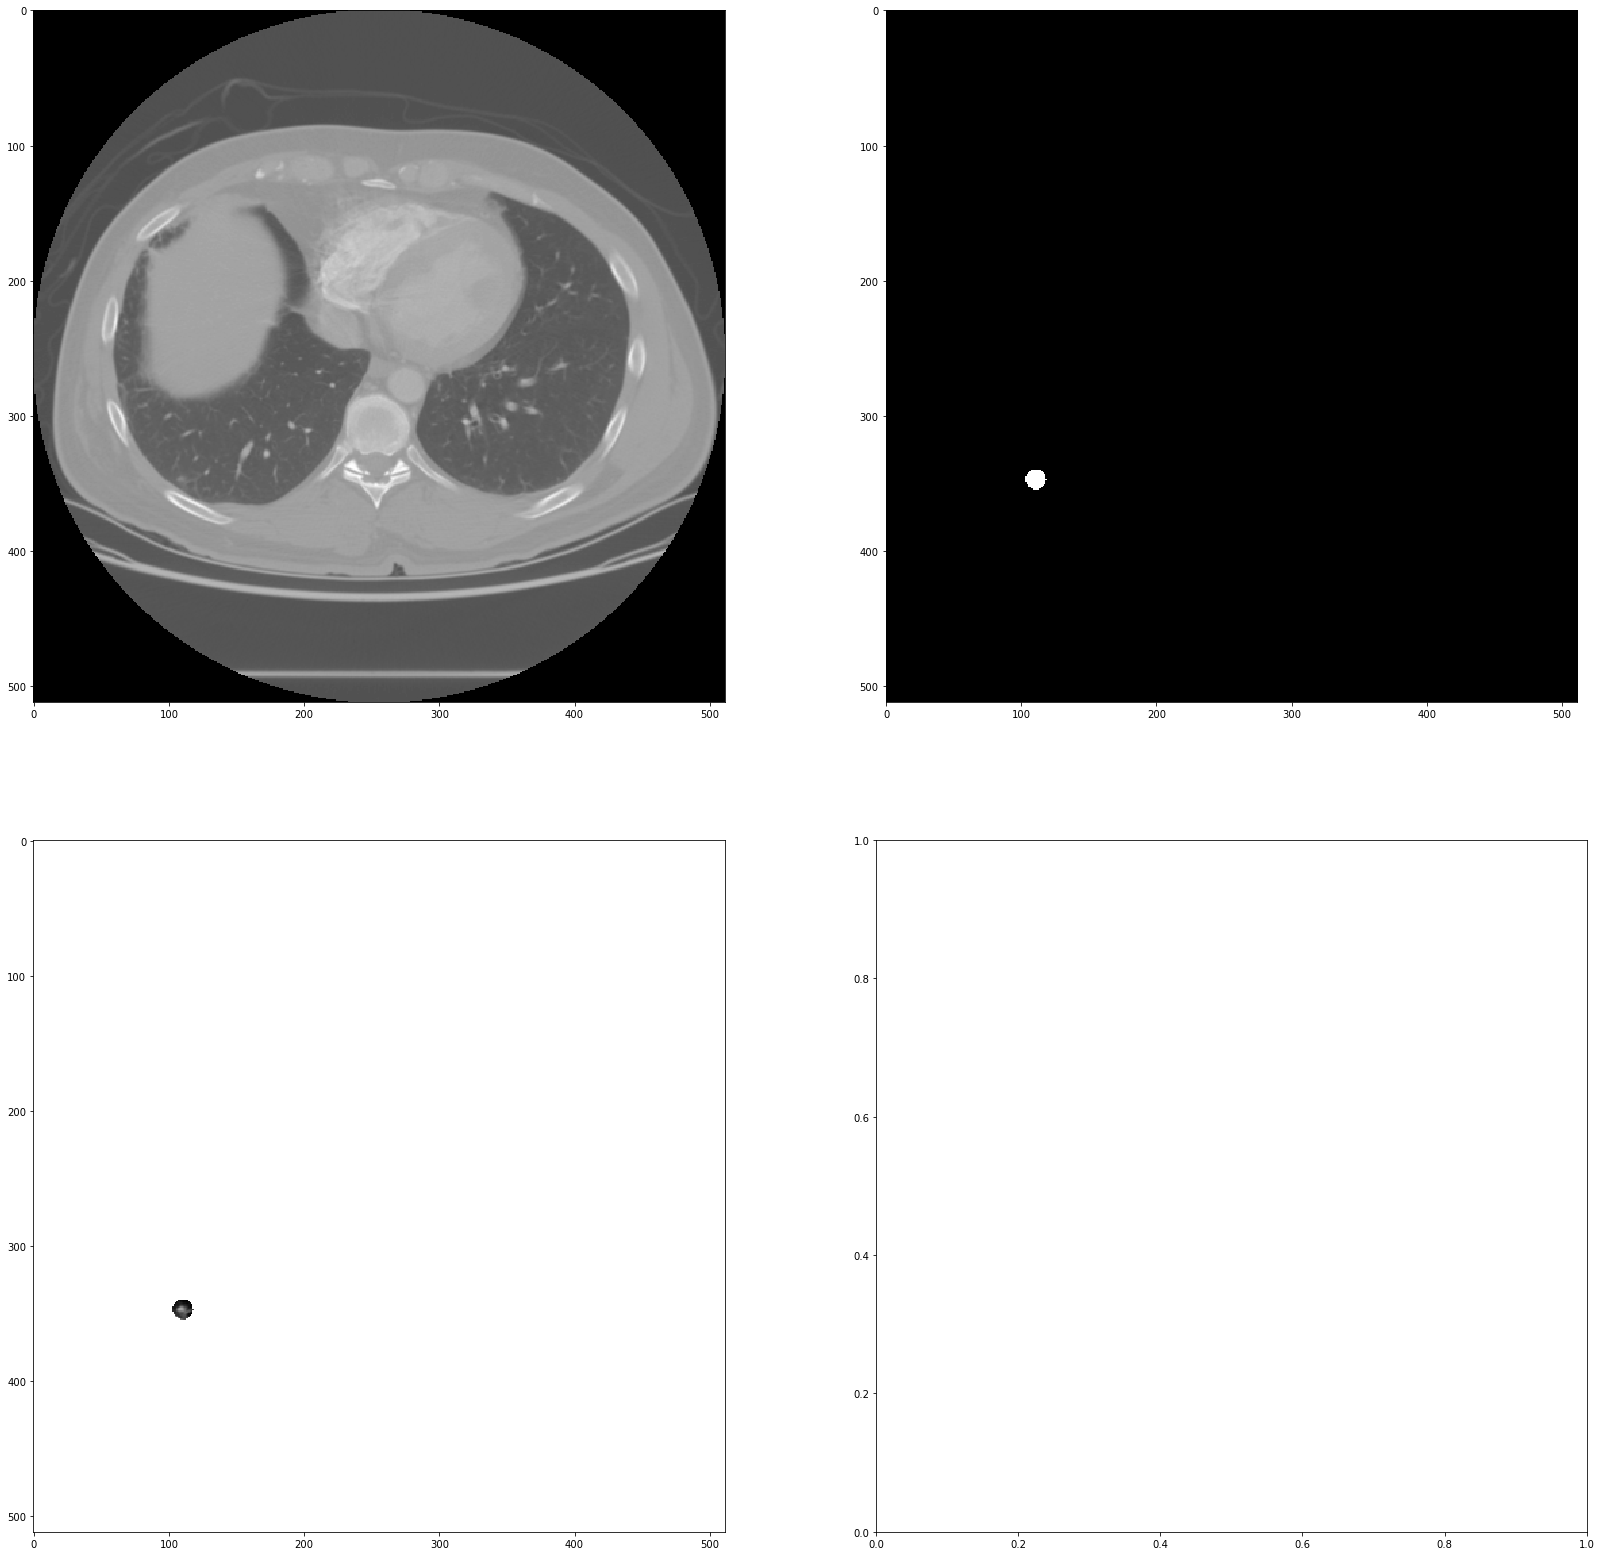

In [39]:
import matplotlib.pyplot as plt

def get_mask(center_pos, center, z_pos, origin, spacing, x_range, y_range, diam):
    mask = np.zeros([y_range, x_range])
    x_min = np.max([0, center_pos[0] - int(diam/spacing[0]) - 1])
    x_max = np.min([x_range, center_pos[0] + int(diam/spacing[0]) + 1])
    y_min = np.max([0, center_pos[1] - int(diam/spacing[0]) - 1])
    y_max = np.min([y_range, center_pos[1] + int(diam/spacing[0]) + 1])
    
    for x in np.arange(x_min, x_max + 1):
        for y in np.arange(y_min, y_max + 1):
            x_pos = x * spacing[0] + origin[0]
            y_pos = y * spacing[1] + origin[1]
            distance = np.linalg.norm(center - np.array([x_pos, y_pos, z_pos]))
            if distance  <= diam:
                mask[y, x] = 1.0
    return mask

if(len(nodule) > 0):
    index = np.argsort(nodule["diameter_mm"].values)[-1]
    x_pos = nodule['coordX'].values[index]
    y_pos = nodule['coordY'].values[index]
    z_pos = nodule['coordZ'].values[index]
    diam = nodule['diameter_mm'].values[index]
    image = sitk.ReadImage(f)
    image_array = sitk.GetArrayFromImage(image)
    length, width, height = image.GetSize()
    print(height)
    center = np.array([x_pos, y_pos, z_pos])
    origin = np.array(image.GetOrigin())
    spacing = np.array(image.GetSpacing())
    center_pos = np.rint((center - origin)/spacing)
    print(center_pos)
    masks = np.ndarray([3, width, length], dtype = np.uint8)
    images = np.ndarray([3, width, length], dtype = np.float32)
    for i, z in enumerate(np.arange(center_pos[2] - 1, center_pos[2] + 2).clip(0, height - 1)):
        masks[i] = get_mask(center_pos, center, z * spacing[2] + origin[2], origin, spacing, length, width, diam)
        images[i] = image_array[z]
        fig,ax = plt.subplots(2,2,figsize=[28,28])
        ax[0,0].imshow(images[i],cmap='gray')
        ax[0,1].imshow(masks[i],cmap='gray')
        ax[1,0].imshow(images[i]*masks[i],cmap='gray')
        plt.show()
        
    